<a href="https://colab.research.google.com/github/azahrasalsaa/PCVK_Ganjil_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


**Transformasi Linier Brightness**

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


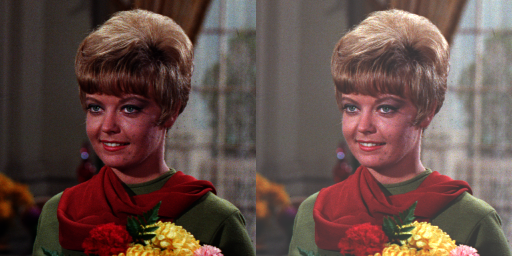

In [9]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# Cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

***PRAKTIKUM***

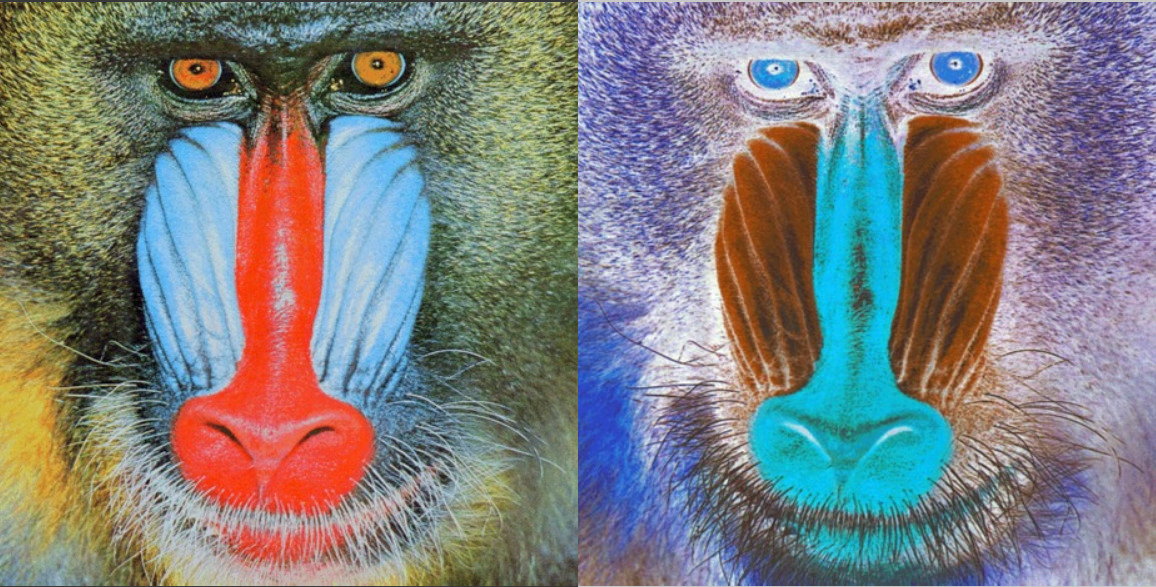

In [11]:
img3 = cv.imread('/content/drive/MyDrive/PCVK/image/img_m3.jpg')

# Membuat citra inverse/negative
inverseImg = 255 - img3

# Tampilkan citra asli dan inverse citra
final_frame = cv.hconcat((img3, inverseImg))
cv2_imshow(final_frame)

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


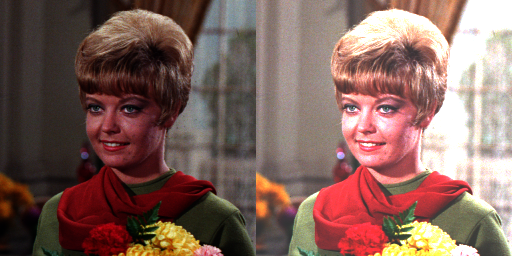

In [12]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')

# Mengambil input dari user untuk kecerahan dan kontras
try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, masukkan angka yang valid.')

# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff')

# Buat gambar baru dengan kontras dan kecerahan diubah
brightness_contrast_image = np.zeros(original.shape, original.dtype)

# Mengakses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            # rumus = g(x,y)=a*f(x,y)+b -> brighnest contrast
            brightness_contrast_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness, 0, 255)

# Cara simple tanpa for-loop:
# brightness_contrast_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

# Gabungkan gambar asli dengan gambar hasil pengaturan kontras dan kecerahan
final_frame = cv.hconcat((original, brightness_contrast_image))

# Tampilkan hasil
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan transformasi log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


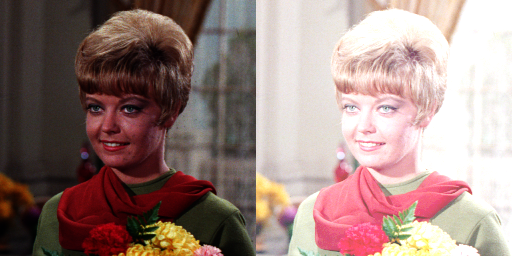

In [13]:
print('Mengubah tingkat kecerahan citra dengan transformasi log')
print('--------------------------------------------------------')

# Mengambil input dari user untuk kecerahan
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, masukkan angka yang valid.')

# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff')

# Buat gambar baru dengan nilai kontras dan kecerahan diubah
brightness_image2 = np.zeros(original.shape, original.dtype)

# Konversi gambar ke float32 untuk operasi logaritma
image_float = np.float32(original)

# Parameter konstanta (c), disesuaikan agar hasil terlihat lebih baik
c = 255 / np.log(1 + np.max(image_float))

# Menerapkan transformasi logaritma
log_transformed = c * (np.log(1 + image_float))

# Normalisasi hasil ke dalam rentang [0, 255]
log_transformed = np.uint8(np.clip(log_transformed, 0, 255))

# Meningkatkan kecerahan sesuai input user
log_transformed = cv.convertScaleAbs(log_transformed, alpha=1, beta=brightness)

# Gabungkan gambar asli dengan gambar hasil pengaturan kontras dan kecerahan
final_frame = cv.hconcat([original, log_transformed])

# Tampilkan hasil
cv2_imshow(final_frame)

**a. averaging**

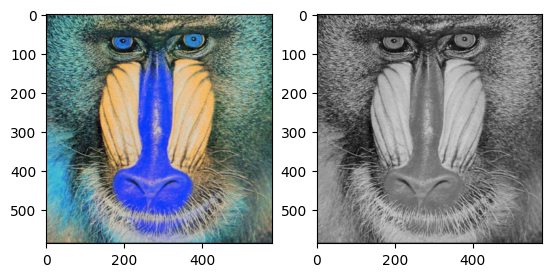

In [14]:
img_avg = cv.imread('/content/drive/MyDrive/PCVK/image/img_m3.jpg')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img3)
ax[1].imshow(img_avg)

**b. lightness**

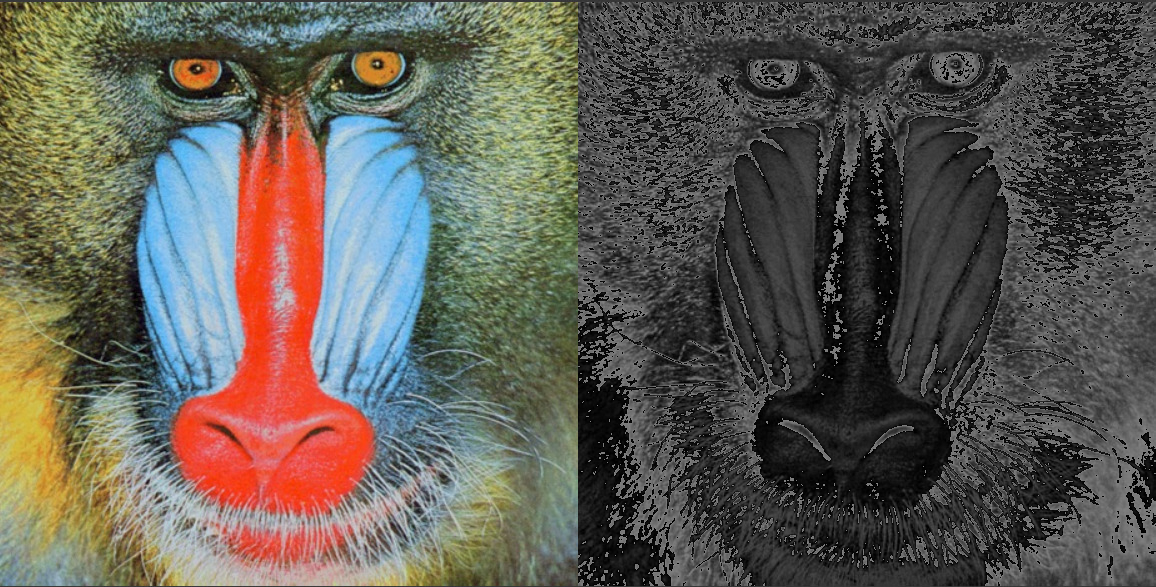

In [21]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Baca gambar asli
img_ori = cv.imread('/content/drive/MyDrive/PCVK/image/img_m3.jpg')

# Ekstrak channel warna Red, Green, dan Blue
B, G, R = cv.split(img_ori)

# Menerapkan metode Lightness: (max[R, G, B] + min[R, G, B]) / 2
max_rgb = np.maximum(np.maximum(R, G), B)
min_rgb = np.minimum(np.minimum(R, G), B)

# Hitung grayscale menggunakan metode Lightness
lightness = ((max_rgb + min_rgb) / 2).astype(np.uint8)

# Konversi grayscale menjadi gambar BGR agar jumlah channel sama saat digabungkan
grayscale_lightness = cv.cvtColor(lightness, cv.COLOR_GRAY2BGR)

# Gabungkan gambar asli dan hasil grayscale secara horizontal
final_frame = cv.hconcat([img_ori, grayscale_lightness])

# Tampilkan hasilnya
cv2_imshow(final_frame)


**C.luminance**

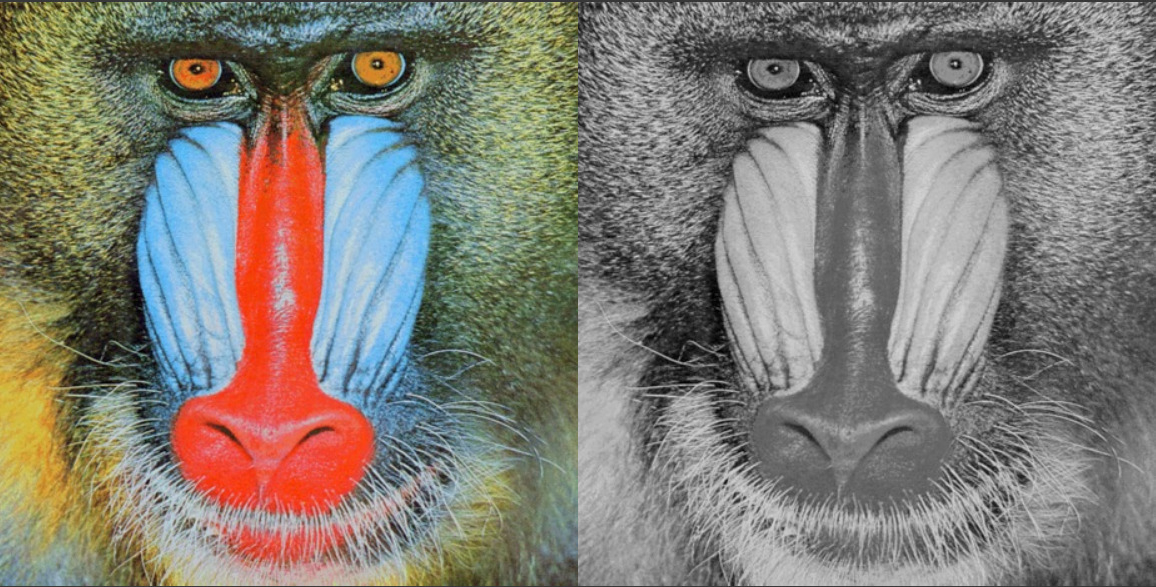

In [25]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Baca gambar asli
img_ori = cv.imread('/content/drive/MyDrive/PCVK/image/img_m3.jpg')

# Ekstrak channel warna Red, Green, dan Blue
B, G, R = cv.split(img_ori)

# Menerapkan metode averaging grayscale: 0.21R + 0.72G + 0.07B
luminance = ((0.21 * R) + (0.72 * G) + (0.07 * B)).astype(np.uint8)

# Konversi grayscale ke BGR agar jumlah channel sama saat digabungkan
greyscale_luminance = cv.cvtColor(luminance, cv.COLOR_GRAY2BGR)

# Gabungkan gambar asli dan gambar grayscale secara horizontal
final_frame = cv.hconcat([img_ori, greyscale_luminance])

# Tampilkan hasilnya
cv2_imshow(final_frame)


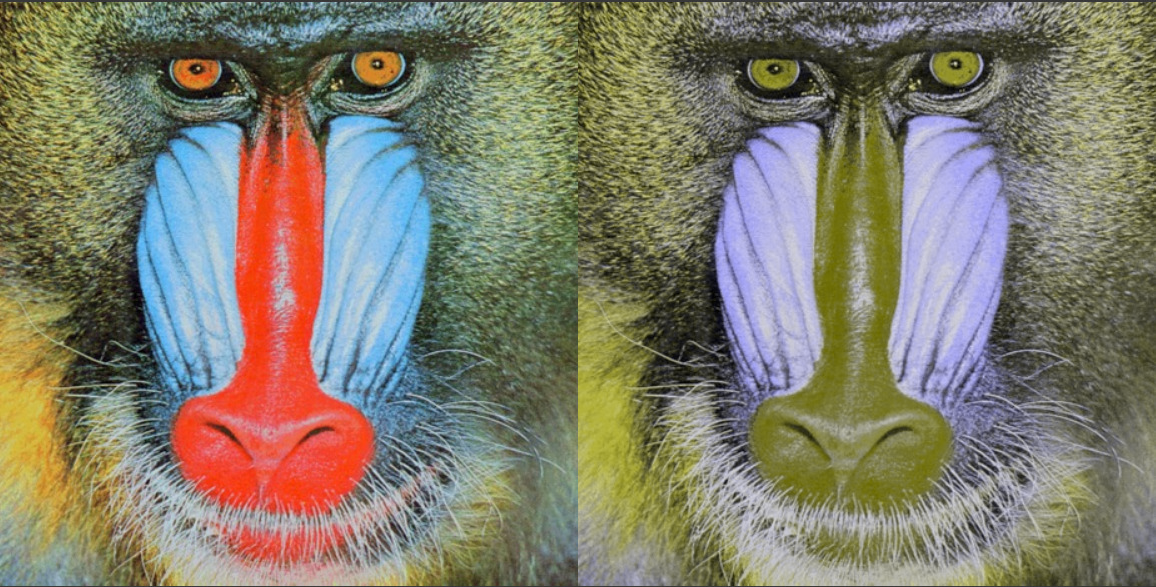

In [26]:
img_ori = cv.imread('/content/drive/MyDrive/PCVK/image/img_m3.jpg')

# Memisahkan gambar menjadi tiga channel: Biru (B), Hijau (G), dan Merah (R)
B, G, R = cv.split(img_ori)

# Membuat versi grayscale dari gambar menggunakan metode rata-rata
grayscale = cv.cvtColor(img_ori, cv.COLOR_BGR2GRAY)

# Menggabungkan channel-channel kembali, dengan channel Biru dari gambar asli,
# sementara channel Hijau dan Merah digantikan dengan gambar grayscale
result_img = cv.merge([B, grayscale, grayscale])

# Menggabungkan gambar asli dan gambar hasil manipulasi secara horizontal
final_frame = cv.hconcat([img_ori, result_img])

# Menampilkan hasil akhir
cv2_imshow(final_frame)